## Load Data

In [100]:
# Import necessary libraries

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [101]:
# Read the dataset and its shape

df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Train_churn.csv')
print('Shape of the dataset: ',df.shape,'\n\n')
df.head()

Shape of the dataset:  (6650, 11) 




,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [102]:
df.describe()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn
count,6650.000000,6.650000e+03,6650.000000,6650.000000,6650.000000,6650.000000
mean,41.130226,8.045954e+05,2.250226,0.515789,0.664361,0.231128
std,9.685747,5.157549e+05,1.458795,0.499788,0.472249,0.421586
min,21.000000,6.300000e+01,0.000000,0.000000,0.000000,0.000000
25%,34.000000,3.922642e+05,1.000000,0.000000,0.000000,0.000000
50%,40.000000,7.649386e+05,2.000000,1.000000,1.000000,0.000000
75%,47.000000,1.147124e+06,3.000000,1.000000,1.000000,0.000000
max,72.000000,2.436616e+06,5.000000,1.000000,1.000000,1.000000


In [103]:
# Data types of every column to look foir categorical variables  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


## Feature Engineering

#### EDA

In [104]:
# Value counts for Income variable
df.Income.value_counts()

10L - 15L        1885
5L - 10L         1847
Less than 5L     1573
More than 15L    1345
Name: Income, dtype: int64

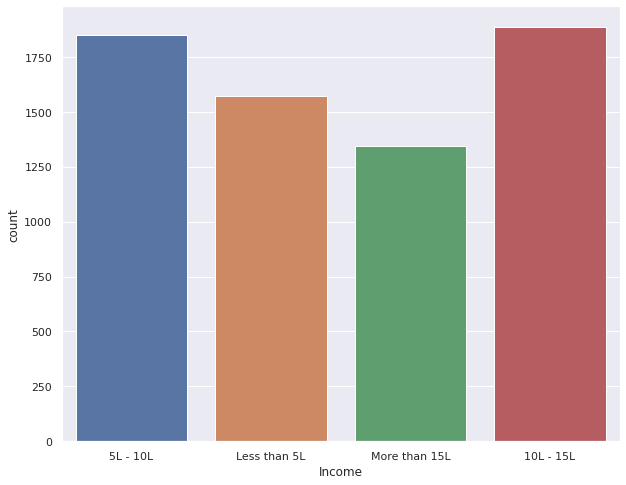

In [105]:
# Countplot for different classes in Income
a4_dims = (10, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(df.Income)

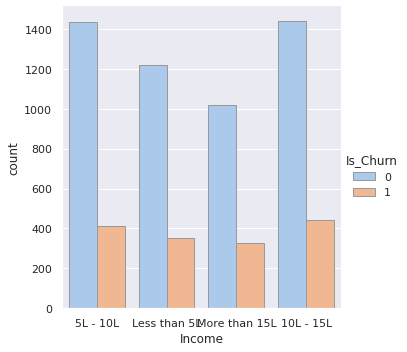

In [106]:
sns.catplot( data=df, x="Income", hue="Is_Churn", kind="count", palette="pastel", edgecolor=".6")

Salaries of highest number of people lies between 5-15L and people from this salary range have highest chances to churn.

In [107]:
# Value counts for Credit Categories
df.Credit_Category.value_counts()

Poor       3076
Average    2043
Good       1531
Name: Credit_Category, dtype: int64

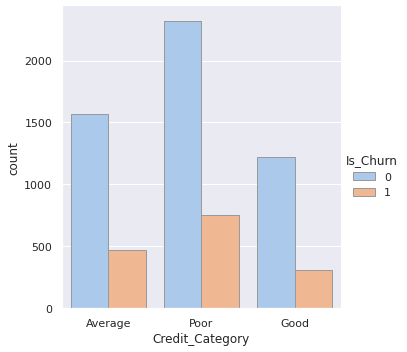

In [108]:
sns.catplot( data=df, x="Credit_Category", hue="Is_Churn", kind="count", palette="pastel", edgecolor=".6")

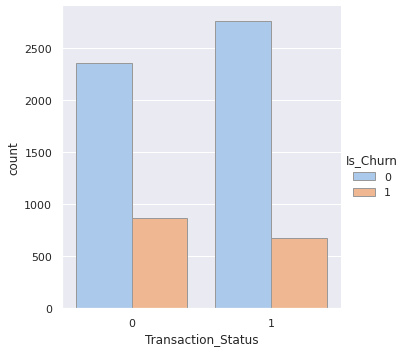

In [114]:
sns.catplot( data=df, x="Transaction_Status", hue="Is_Churn", kind="count", palette="pastel", edgecolor=".6")

People with good credit and transaction status are less likely to churn.

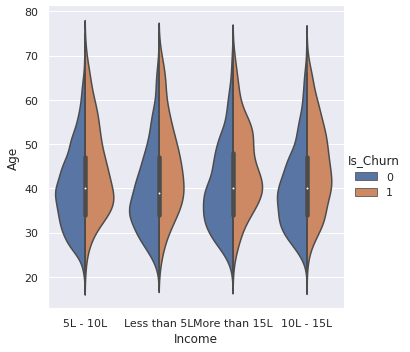

In [110]:
sns.catplot(data=df, x="Income", y="Age", hue="Is_Churn", kind="violin", split=True)

Adults within 35-55 age group are more likely to churn.

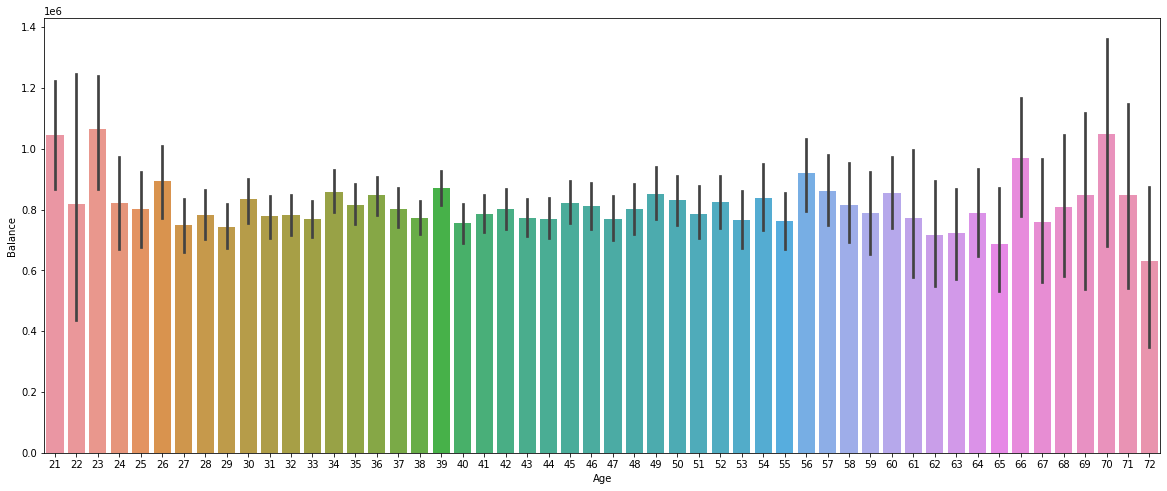

In [ ]:
# barplot for determining the relationship between unemployment and gaps in resume
a4_dims = (20,8 )
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x = 'Vintage',   y = 'Balance', data = df)

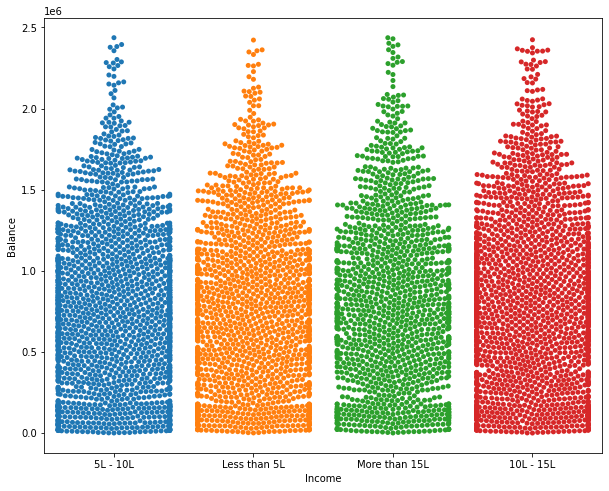

In [ ]:
# swarmplot for different levels for education an income
a4_dims = (10,8 )
fig, ax = plt.subplots(figsize=a4_dims)
sns.swarmplot(x = 'Income',y = 'Balance',data = df)

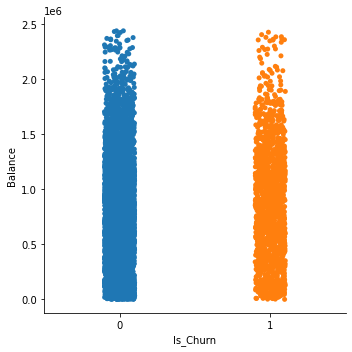

In [ ]:
sns.catplot("Is_Churn", "Balance", data = df)

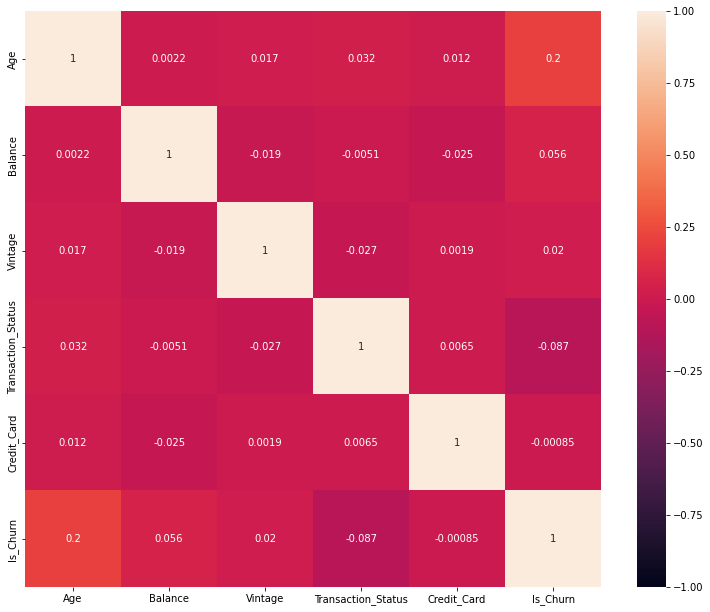

In [ ]:
# Correlation matrix to check for dependencies
fig = plt.figure(figsize=(10,8))
fig.add_axes([0,0,1,1])
ax = fig.get_axes()[0]
sns.heatmap(df.corr(), ax=ax, vmin=-1, vmax=1, annot=True)

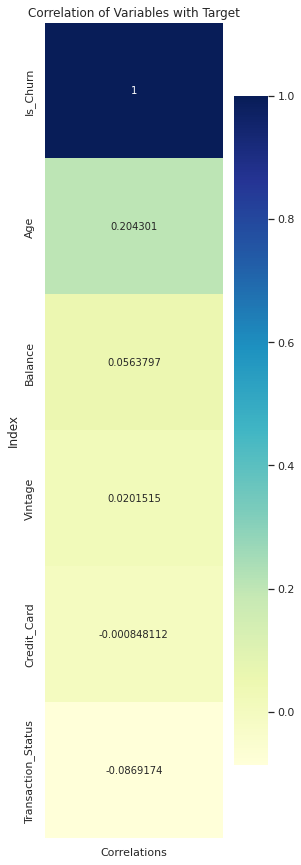

In [112]:
# Correlation of Variables with target
corr = df.corrwith(df['Is_Churn']).reset_index()
corr.columns = ['Index','Correlations']
corr = corr.set_index('Index')
corr = corr.sort_values(by=['Correlations'], ascending = False)
plt.figure(figsize=(4,15))
fig = sns.heatmap(corr, annot=True, fmt="g", cmap='YlGnBu')
plt.title("Correlation of Variables with Target")
plt.show()

Since the column 'Credit_Card' has the lowest correlation with the dependent variable, we will drop it.

#### Missing Value Treatment

In [90]:
# Missing values
df.isnull().sum()

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

There are no missing values in the dataset.

#### Outlier Detection

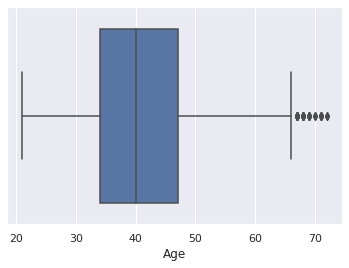

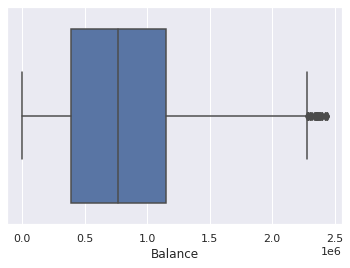

In [91]:
l=['Age','Balance']
for i in l:
    sns.boxplot(df[i])
    plt.show()

In [92]:
# Treating outliers detected in Age and Balance
from collections import Counter
def outlier(df_o, degiskenler):
    aykiri_indexler = []
    for i in degiskenler:
        Q1 = df_o[i].quantile(0.25)
        Q3 = df_o[i].quantile(0.75)
        IQR = Q3 - Q1
        alt_sinir = Q1 - 1.5*IQR
        ust_sinir = Q3 + 1.5*IQR
        toplam_filtre = ((df_o[i] < alt_sinir) | (df_o[i] > ust_sinir))
        aykiri_gozlemler = df_o[i][toplam_filtre]
        aykiri_index = aykiri_gozlemler.index       
        aykiri_indexler.extend(aykiri_index)        
    aykiri_indexler = Counter(aykiri_indexler)    
    ortak_indexler = [i for i, v in aykiri_indexler.items() if v > 0]   
    return ortak_indexler
ortak_indexler = outlier(df, ["Age","Balance"])
df.loc[ortak_indexler]

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
40,487f90af,68,Female,Less than 5L,634975.74,3,0,2,0,Average,1
78,51c1da4d,67,Female,Less than 5L,227871.54,2,1,3+,1,Good,0
160,2320f996,68,Female,Less than 5L,82341.00,1,1,2,1,Good,0
222,7222dd13,67,Male,5L - 10L,892519.56,3,0,2,0,Poor,1
338,af1e9e20,71,Male,5L - 10L,510126.48,3,0,2,1,Poor,1
...,...,...,...,...,...,...,...,...,...,...,...
5938,994d9323,54,Male,More than 15L,2345304.15,3,0,1,1,Poor,1
5945,0d90e025,57,Female,More than 15L,2289493.89,4,0,1,1,Poor,0
6090,b867f3ce,49,Female,10L - 15L,2360097.81,1,0,1,0,Average,1
6168,643836fe,43,Female,More than 15L,2383123.77,3,0,1,1,Average,1


In [93]:
df = df.drop(ortak_indexler, axis = 0).reset_index(drop = True)

#### Data Scaling & Shuffling

In [94]:
# Scaling the Balance coloumn in the datset
df['Balance']= df['Balance']/(df['Balance'].max()-df['Balance'].min())

In [95]:
# Shuffle the dataset
df = df.sample(frac = 1)

#### Feature Transformation

In [96]:
# Label encoding of categorical variables
from sklearn.preprocessing import LabelEncoder

# Using Label Encoding method for Gender as ranking will not affect the results
df['Gender']=LabelEncoder().fit_transform(df['Gender'])

# Using One Hot Encoding method for transforming other categorical variables
df = pd.get_dummies(df, columns =['Credit_Category', 'Product_Holdings', 'Income'], drop_first = True)

## Model Building

#### Data Splitting

In [97]:
# Separate target variable('Is_Churn') from the dataset
y = df[['Is_Churn']]

# Drop target variable and other unnecessary columns
df.drop(['Is_Churn','ID', 'Credit_Card'],axis=1,inplace=True)
df.head()

,Age,Gender,Balance,Vintage,Transaction_Status,Credit_Category_Good,Credit_Category_Poor,Product_Holdings_2,Product_Holdings_3+,Income_5L - 10L,Income_Less than 5L,Income_More than 15L
5096,47,0,0.044950,1,1,0,0,1,0,0,1,0
4629,35,0,0.291484,1,0,0,1,1,0,1,0,0
1479,50,1,0.204273,3,0,0,0,1,0,0,1,0
1469,37,1,0.465860,3,0,0,1,1,0,0,1,0
1185,26,0,0.020561,3,0,1,0,1,0,0,0,1


In [98]:
# Split the dataset into training and testing columns

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y ,test_size = 0.2, random_state = 0)

#### Machine Learning Algorithms

In [38]:
sns.set(rc={'figure.figsize':(11,8)})
results=dict()

##### Random Forest

In [59]:
# Random Forest Classifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

forest = RandomForestClassifier(max_depth=5,n_estimators=150,random_state=0)
forest.fit(X_train, y_train)

y_pred=forest.predict(X_test)
yhat=forest.predict(X_train)
results['Random Forest']=accuracy_score(y_test, y_pred)*100
print('Accuracy on Train data: ',accuracy_score(y_train, yhat)*100,'\nAccuracy on Test data: ',accuracy_score(y_test, y_pred)*100)

Accuracy on Train data:  77.21205186880245 
Accuracy on Test data:  77.11670480549199


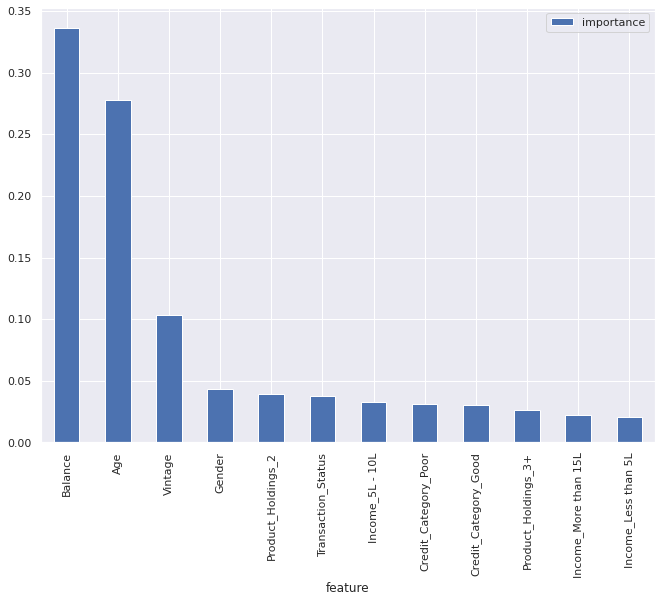

In [60]:
# Feature importance visualization using random forest
importances = pd.DataFrame({'feature':df.columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()

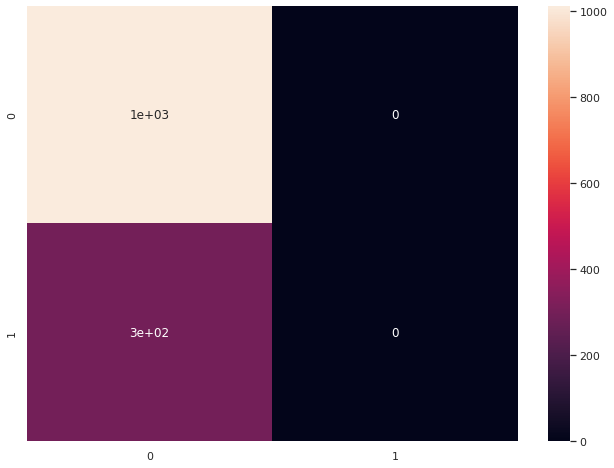

In [61]:
# Confusion matrix for random forest classifier
cf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True)

##### LGBM Classifier

In [62]:
# LGBM Classifier
from lightgbm import LGBMClassifier
lgb_model = LGBMClassifier()
lgbm_params = {'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 6,
 'n_estimators': 500}
lgbm = LGBMClassifier(**lgbm_params).fit(X_train, y_train)

y_pred=lgbm.predict(X_test)
yhat=lgbm.predict(X_train)
results['LGBM Classifier']=accuracy_score(y_test, y_pred)*100
print('Accuracy on Train data: ',accuracy_score(y_train, yhat)*100,'\nAccuracy on Test data: ',accuracy_score(y_test, y_pred)*100)

Accuracy on Train data:  77.32646834477498 
Accuracy on Test data:  77.11670480549199


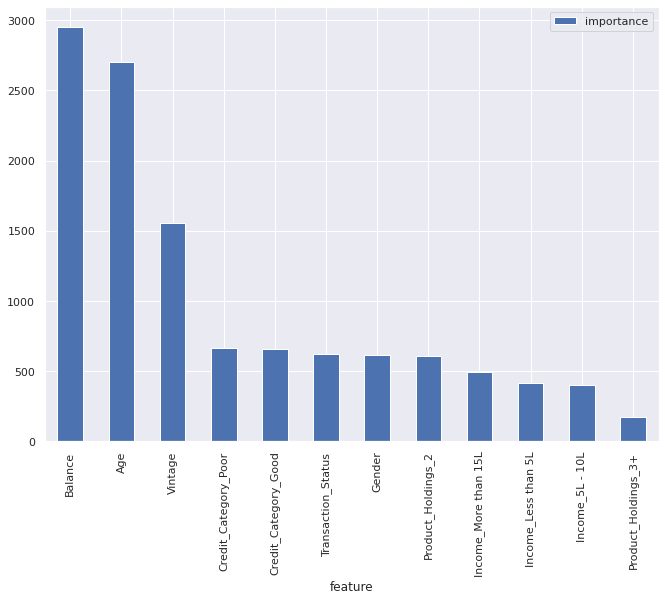

In [63]:
# Feature importance visualization using LGBM Classifier
importances = pd.DataFrame({'feature':df.columns,'importance':np.round(lgbm.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()

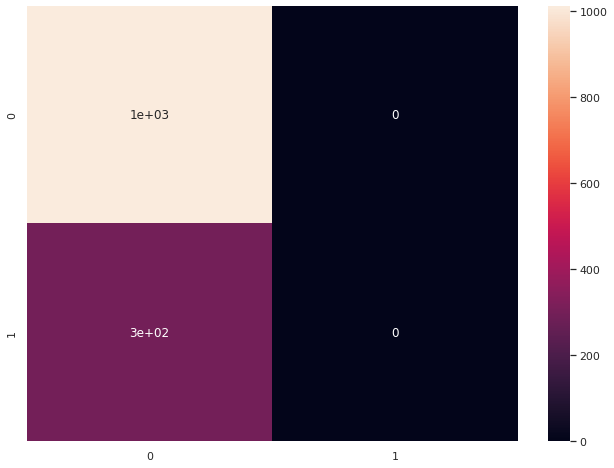

In [64]:
# Confusion matrix for random forest classifier

cf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True)

##### Gradient Boosting Classifier

In [65]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
parameters = {
              'n_estimators': [100,150, 200, 250, 300],
              'max_depth': [2,3,4,5,7,10],
              }
clf = GradientBoostingClassifier()
gb = GridSearchCV(clf, parameters)
gb.fit(X_train, y_train)

y_pred= gb.predict(X_test)
yhat = gb.predict(X_train)
results['Gradient Boosting Classifier']=accuracy_score(y_test, y_pred)*100
print('Accuracy on Train data: ',accuracy_score(y_train, yhat)*100,'\nAccuracy on Test data: ',accuracy_score(y_test, y_pred)*100)


Accuracy on Train data:  77.38367658276125 
Accuracy on Test data:  77.19298245614034


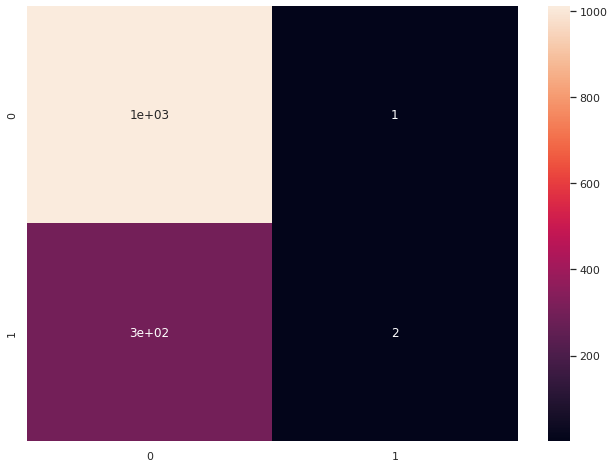

In [66]:
# Confusion matrix for Gradient Boosting 
cf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True)

##### Multiple Layer Perceptron

In [69]:
# Multiple Layer Perceptron
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
yhat = clf.predict(X_train)
results['Multiple Layer Perceptron']=accuracy_score(y_test, y_pred)*100
print('Accuracy on Train data: ',accuracy_score(y_train, yhat)*100,'\nAccuracy on Test data: ',accuracy_score(y_test, y_pred)*100)

Accuracy on Train data:  77.21205186880245 
Accuracy on Test data:  77.11670480549199


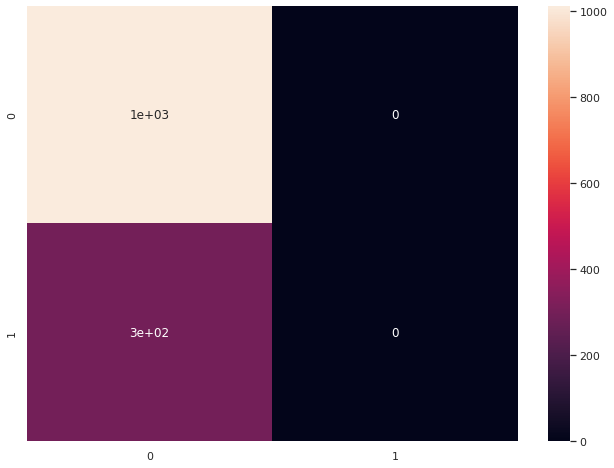

In [70]:
# Confusion matrix for Multiple Layer Perceptron
cf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True)

##### Support Vector Classifier

In [ ]:
# Support Vector Classifier
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

In [74]:
y_pred=grid.predict(X_test)
yhat = grid.predict(X_train)
results['Support Vector Classifier']=accuracy_score(y_test, y_pred)*100
print('Accuracy on Train data: ',accuracy_score(y_train, yhat)*100,'\nAccuracy on Test data: ',accuracy_score(y_test, y_pred)*100)

Accuracy on Train data:  77.21205186880245 
Accuracy on Test data:  77.11670480549199


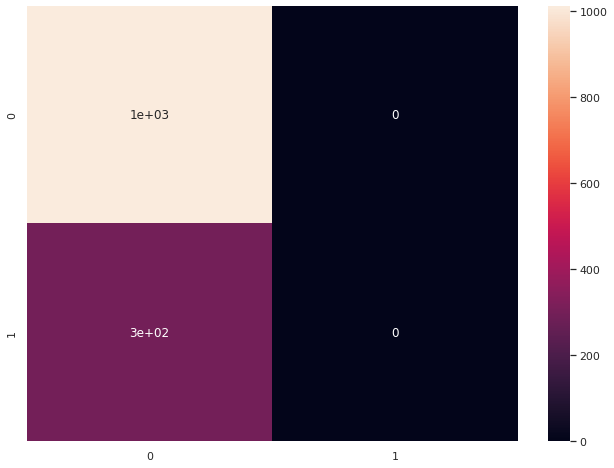

In [75]:
# Confusion matrix for Support Vector Classifier
cf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True)

## Results

In [76]:
print(sorted(results.items()), sep='\nn')

[('Gradient Boosting Classifier', 77.19298245614034), ('LGBM Classifier', 77.11670480549199), ('Multiple Layer Perceptron', 77.11670480549199), ('Random Forest', 77.11670480549199), ('Support Vector Classifier', 77.11670480549199)]


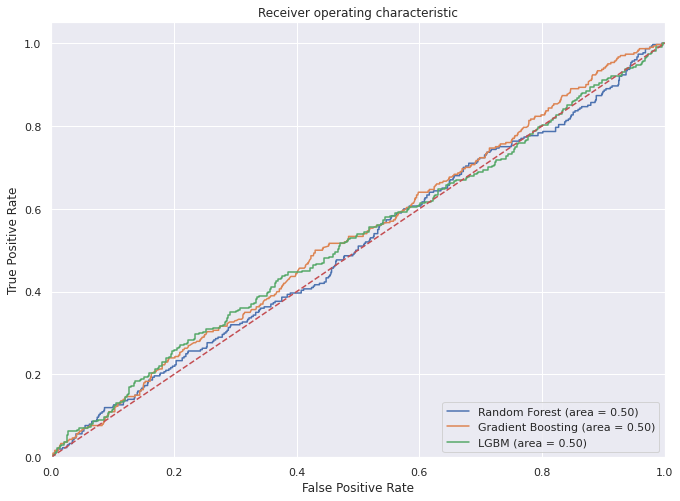

In [80]:
# Compare results 
from sklearn.metrics import roc_auc_score,roc_curve
rf_roc_auc = roc_auc_score(y_test, forest.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, forest.predict_proba(X_test)[:,1])

gb_roc_auc = roc_auc_score(y_test, gb.predict(X_test))
gb_fpr, gb_tpr, gb_thresholds = roc_curve(y_test, gb.predict_proba(X_test)[:,1])

lg_roc_auc = roc_auc_score(y_test, lgbm.predict(X_test))
lg_fpr, lg_tpr, lg_thresholds = roc_curve(y_test, lgbm.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(gb_fpr, gb_tpr, label='Gradient Boosting (area = %0.2f)' % gb_roc_auc)
plt.plot(lg_fpr, lg_tpr, label='LGBM (area = %0.2f)' % lg_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()